## Aarif Munwar Jahan
## CIS 9760 Fall 2021 Project 2

# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-spark-yelp1/*.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
# Install necessary packages - pandas for dataframe manipulation, matplotlib, seaborn for visualization, scipy as seaborn dependency

sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.0")
sc.install_pypi_package("seaborn==0.10.0")


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
2,application_1638426119483_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

## Importing

Now, import the installed packages from the previous block below.

In [2]:
# Import necessary packages to the workbook

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql.functions import split, explode, approx_count_distinct, avg

# Use ggplot for chart color rendering
plt.style.use('ggplot')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [3]:
# Load data from S3 into spark dataframe

df_business = spark.read.json( 's3://sta9760-spark-yelp1/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Display the number of rows and columns in our dataset.

In [4]:
# Display Columns and Rows 

print(f'Columns: {len(df_business.dtypes)} | Rows: {df_business.count():,}') 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 160,585

Display the DataFrame schema below.

In [5]:
# Print dataframe schema

df_business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `stars`
* `categories`

In [6]:
# Display first 5 rows of desired columns in the business dataframe

df_business.select('business_id','name','city','state','stars','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [7]:
# Transform categories column from multi value to single value and split rows based on that

df_business = df_business.withColumn('category',
                                     explode(split('categories',', ')))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 5 rows of your association table below.

In [8]:
# Display first 5 rows of the newly created association table

df_business.select('business_id','category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|    category|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [9]:
# Display count of unique categories

print('Unique Rows: ', df_business.select(approx_count_distinct("category")).collect())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Unique Rows:  [Row(approx_count_distinct(category)=1367)]

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [10]:
# Groupby categories to get count for each category in a new dataframe

df_business_cat = df_business.groupby("category").count()
df_business_cat.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|        Summer Camps|  308|
|       Outlet Stores|  184|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|              Doulas|   52|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [11]:
# Convert to spark dataframe to pandas dataframe
df_pd_business_cat = df_business_cat.toPandas()

# Sort values to get top cateogories at the top
df_pd_business_cat.sort_values('count',ascending=False, inplace=True)

# Reduce the dataframe to include only top 20 categories
df_pd_business_cat = df_pd_business_cat.head(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

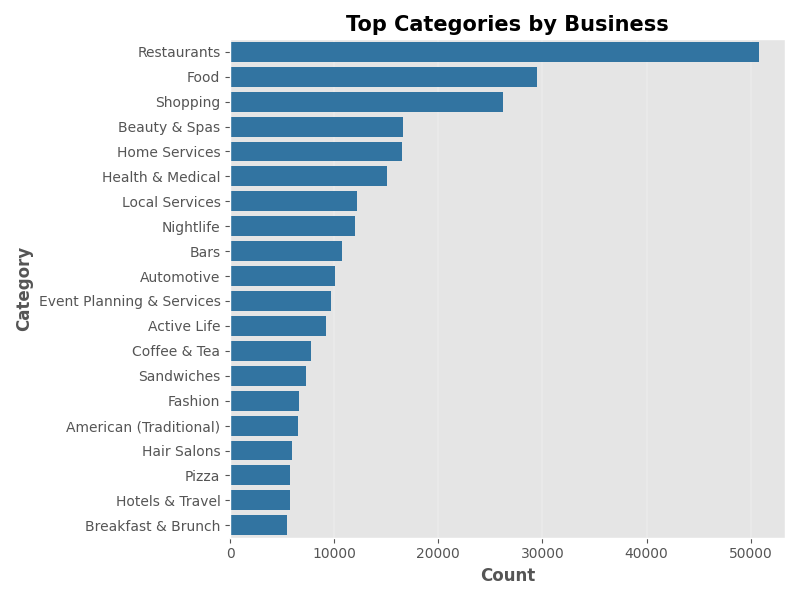

In [12]:
# Setup a matplotlib figure and axis
fig, ax = plt.subplots(figsize = (8,6))


# Draw seaborn horizontal bar chart
df_pd_business_cat_plot = sns.barplot(x = 'count', y = 'category', 
                                      data = df_pd_business_cat, 
                                      ax = ax, 
                                      color = 'tab:blue')

# Set chart title and axis labels
ax.set_title("Top Categories by Business", fontweight = 'bold', fontsize = 15)
ax.set_xlabel('Count', fontweight = 'bold')
ax.set_ylabel('Category', fontweight = 'bold')

# Use tight layout to ensure all column tags are visible on the plot
plt.tight_layout()

# Set applicable x-axis gridlines and disable y axis ones
ax.grid(linestyle='-', linewidth=0.25, axis = 'x')
ax.grid(visible=False, axis = 'y')

# Use magic function to display the chart inline
%matplot plt


# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [13]:
# Load review data from json file in S3 into a spark dataframe
df_review = spark.read.json('s3://sta9760-spark-yelp1/yelp_academic_dataset_review.json')

# Print schema to see attributes
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [14]:
# List business_id and starts columns

df_review.select('business_id','stars').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [15]:
# Aggregate on average stars
df_review_avg_stars = df_review.groupBy("business_id").agg({'stars':'avg'})

# Display results after aggregation
df_review_avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|uEUweopM30lHcVxjO...|              3.0|
|L3WCfeVozu5etMhz4...|              4.2|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [16]:
# Join reviews and business dataframes on business_id
df_business_review = df_review_avg_stars.join(df_business,'business_id')

# Drop duplicates from business id column
df_business_review = df_business_review.dropDuplicates(['business_id'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [17]:
# Display important columns after joining
df_business_review.select('avg(stars)','stars','name','city','state').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+
|        avg(stars)|stars|                name|      city|state|
+------------------+-----+--------------------+----------+-----+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|               5.0|  5.0|          WonderWell|    Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+------------------+-----+--------------------+----------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [18]:
# Create new column by calculating skew score based on the formula given above,then convert to pandas dataframe
df_business_review_skew = df_business_review.select(
    (df_business_review["avg(stars)"] - df_business_review["stars"]) / df_business_review["stars"])

df_business_review_skew_plot = df_business_review_skew.toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

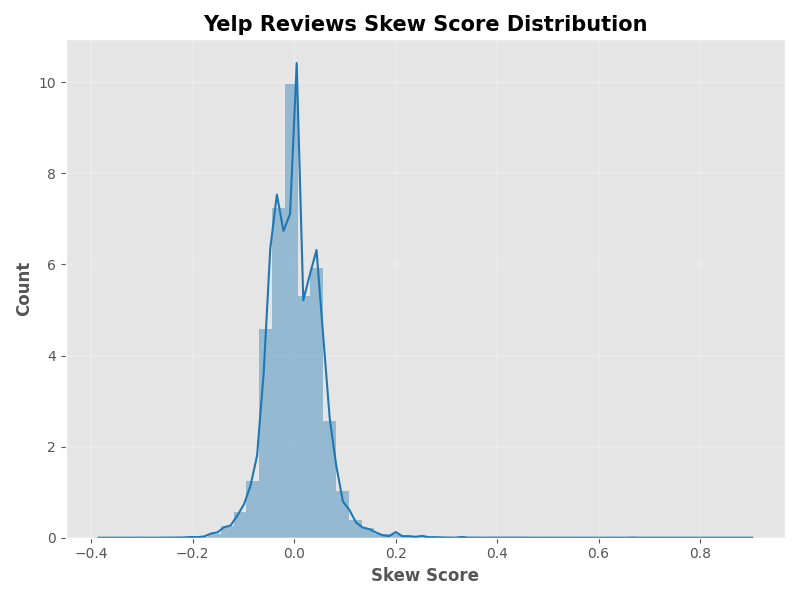

In [19]:
# Define figure and axis for the dist plot

fig, ax = plt.subplots(figsize = (8,6))

# Plot distribution of scew scores vs its count
df_business_review_skew_sns_plot = sns.distplot(df_business_review_skew_plot, color= 'tab:blue')

# Set axis and chart titles
ax.set_title("Yelp Reviews Skew Score Distribution", fontweight = 'bold', fontsize = 15)
ax.set_xlabel('Skew Score', fontweight = 'bold')
ax.set_ylabel('Count', fontweight = 'bold')

# Use tight layout to ensure all column tags are visible on the plot
plt.tight_layout()

# Set applicable x-axis and y-axis gridlines
ax.grid(linestyle='-', linewidth=0.25, axis = 'x')
ax.grid(linestyle='-', linewidth=0.25, axis = 'y')

# Use magic function to display chart in line
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

#### Based on the distribution plot, there are no strong implications that Yelp reviews skew negative. Although we can notice a slight shift towards negative, positive side balances out at other levels making the distinction not enough to determine that yelp reviews skew negative. This would make sense in general, since this data looks at data across many different business types i.e. reviews might have strong negative skew for restaurants while strong positive skew for home services; we will not be able to capture that event. Perhaps more meaningful trends can be observed if we look at this type of skew distribution focusing on individual business types e.g. restaurants, home services separately.

# Should the Elite be Trusted?

In [20]:
# Load user data from s3 into a spark dataframe
df_user = spark.read.json('s3://sta9760-spark-yelp1/yelp_academic_dataset_user.json' )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# Get columns and rows for user dataframe
print(f'Columns: {len(df_user.dtypes)} | Rows: {df_user.count():,}') 

# Display schemas for user and review dataframes to start data exploration
df_user.printSchema()
df_review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 22 | Rows: 2,189,457
root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

root
 |-- business_id: string (nullable

In [22]:
# Explore the user dataframe
df_user.select('user_id','elite').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|             user_id|               elite|
+--------------------+--------------------+
|q_QQ5kBBwlCcbL1s4...|2006,2007,2008,20...|
|dIIKEfOgo0KqUfGQv...|2007,2008,2009,20...|
|D6ErcUnFALnCQN4b1...|           2010,2011|
|JnPIjvC0cmooNDfsa...|2009,2010,2011,20...|
|37Hc8hr3cw0iHLoPz...|      2009,2010,2011|
+--------------------+--------------------+
only showing top 5 rows

In [23]:
# Filter user dataframe to elite users only - remove users where elite column is blank
df_elite_user = df_user.filter(df_user['elite'] != '').select('user_id', 'elite')

# Get relevant columns from review dataframe
df_review_short = df_review.select('business_id', 'stars', 'user_id')


# Join the two dataframes to get reviews done by elite users only
df_review_elite = df_elite_user.join(df_review_short,'user_id')

# Display the result
df_review_elite.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+--------------------+-----+
|             user_id|               elite|         business_id|stars|
+--------------------+--------------------+--------------------+-----+
|0JQYSCWOQWKqK7KMj...| 2015,2016,2017,2018|eCLuYcTuQpDPFOezh...|  4.0|
|l91pXxTZGS5CNWjNB...|2012,2013,2014,20...|RP_U_TyolABy3eYuR...|  3.0|
|WAyYDJKFMzlTTnKxq...|2011,2012,2013,20...|_6TF9YiOiYSToPBRz...|  5.0|
|g34Qcj06LmCDhKzks...|2017,2018,2019,20,20|bxy3khT-2R66tcdKj...|  4.0|
|_UMIAnpnXWAqXS4y6...|2015,2016,2017,20...|A0F6H8OO3qYAvI2L3...|  4.0|
+--------------------+--------------------+--------------------+-----+
only showing top 5 rows

In [24]:
# Aggregate on average stars given by elite users
df_review_elite_avg_stars = df_review_elite.groupBy("business_id").agg(avg("stars").alias("elite_avg_stars"))
df_review_elite_avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+
|         business_id|elite_avg_stars|
+--------------------+---------------+
|L3WCfeVozu5etMhz4...|            4.6|
|2boQDeHxopolPtJhV...|            5.0|
|XzXcpPCb8Y5huklEN...|            4.0|
|O_BAT_rvszHYBNEM6...|            2.8|
|yHtuNAlYKtRZniO8O...|            4.5|
+--------------------+---------------+
only showing top 5 rows

In [25]:
# Join the two dataframes to see elite reviews and overall reviews as two columns for each business

df_review_all = df_review_elite_avg_stars.join(df_review_avg_stars,'business_id')
df_review_all.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+------------------+
|         business_id|elite_avg_stars|        avg(stars)|
+--------------------+---------------+------------------+
|--JuLhLvq3gyjNnXT...|            5.0|               5.0|
|--_nBudPOb1lNRgKf...|            4.5|             3.875|
|--kyOk0waSrCDlbSv...|           3.75|3.8666666666666667|
|--z9usx6Fin8P_f0v...|            5.0|               5.0|
|-0qeY1293steyCqYh...|            4.0|             3.375|
+--------------------+---------------+------------------+
only showing top 5 rows

In [26]:
# Convert spark dataframe to pandas dataframe in preparation for plotting

df_review_all_plotdf = df_review_all.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

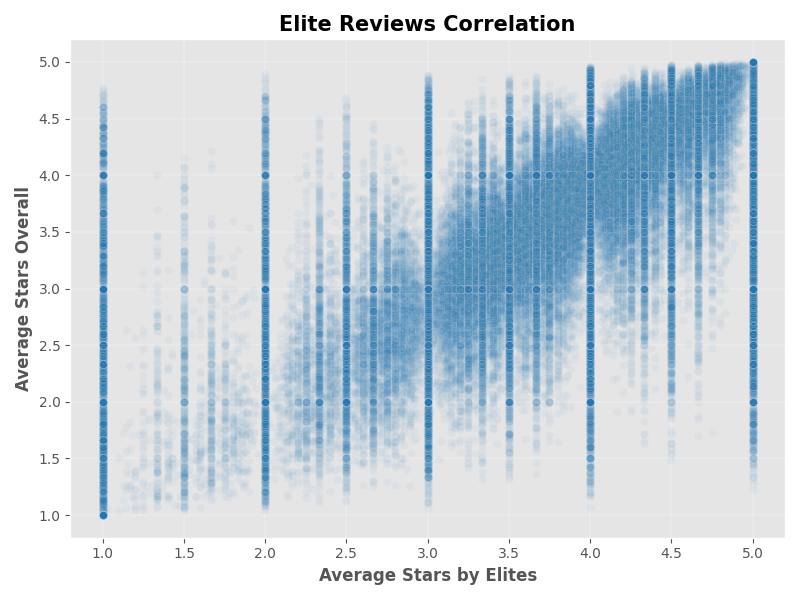

In [27]:
# Define figure and axis for the scatter plot
fig, ax = plt.subplots(figsize = (8,6))

# Scatter plot to see correlation between elite and overall reviews
df_review_all_plot = sns.scatterplot('elite_avg_stars', 'avg(stars)', data = df_review_all_plotdf, alpha = 0.04, color = 'tab:blue', ax=ax)

# Set axis and chart titles
ax.set_title("Elite Reviews Correlation", fontweight = 'bold', fontsize = 15)
ax.set_xlabel('Average Stars by Elites', fontweight = 'bold')
ax.set_ylabel('Average Stars Overall', fontweight = 'bold')

# Use tight layout to ensure all column tags are visible on the plot
plt.tight_layout()

# Set applicable x-axis and y-axis gridlines
ax.grid(linestyle='-', linewidth=0.25, axis = 'x')
ax.grid(linestyle='-', linewidth=0.25, axis = 'y')

# # Use magic function to display chart in line
%matplot plt

#### Based on the correlation analysis between Elite reviews and Overall reviews across all businesses, it seems like overall elite reviews can be trusted within reason. As we see in the scatter plot with the proportional alpha parameter, majority of the trends show slightly positive correlation at the top right corner of the chart. However, for each rounded star rating (1.0, 2.0, 3.0 etc.), we do see a mixed correlation which seem to correspond to businesses that have very low number of review count in general. Therefore, if the popular businessses are considered (high review count), then elite reviewers tend to agree with the overall reviewers and there is not substantial reason to doubt their judgements. However, on the flip side, reviews from Elite members should also not be treated as "special" since their reviews are mostly in agreement as the overall reviewers.

# What are some underlying trends with the Yelp users?

In [28]:
# Get a target version of the user dataframe

df_user_short = df_user.select("user_id", "funny", "review_count", "useful", "cool", "average_stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# Convert spark dataframe to pandas in preparation for plotting

df_user_pd = df_user_short.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

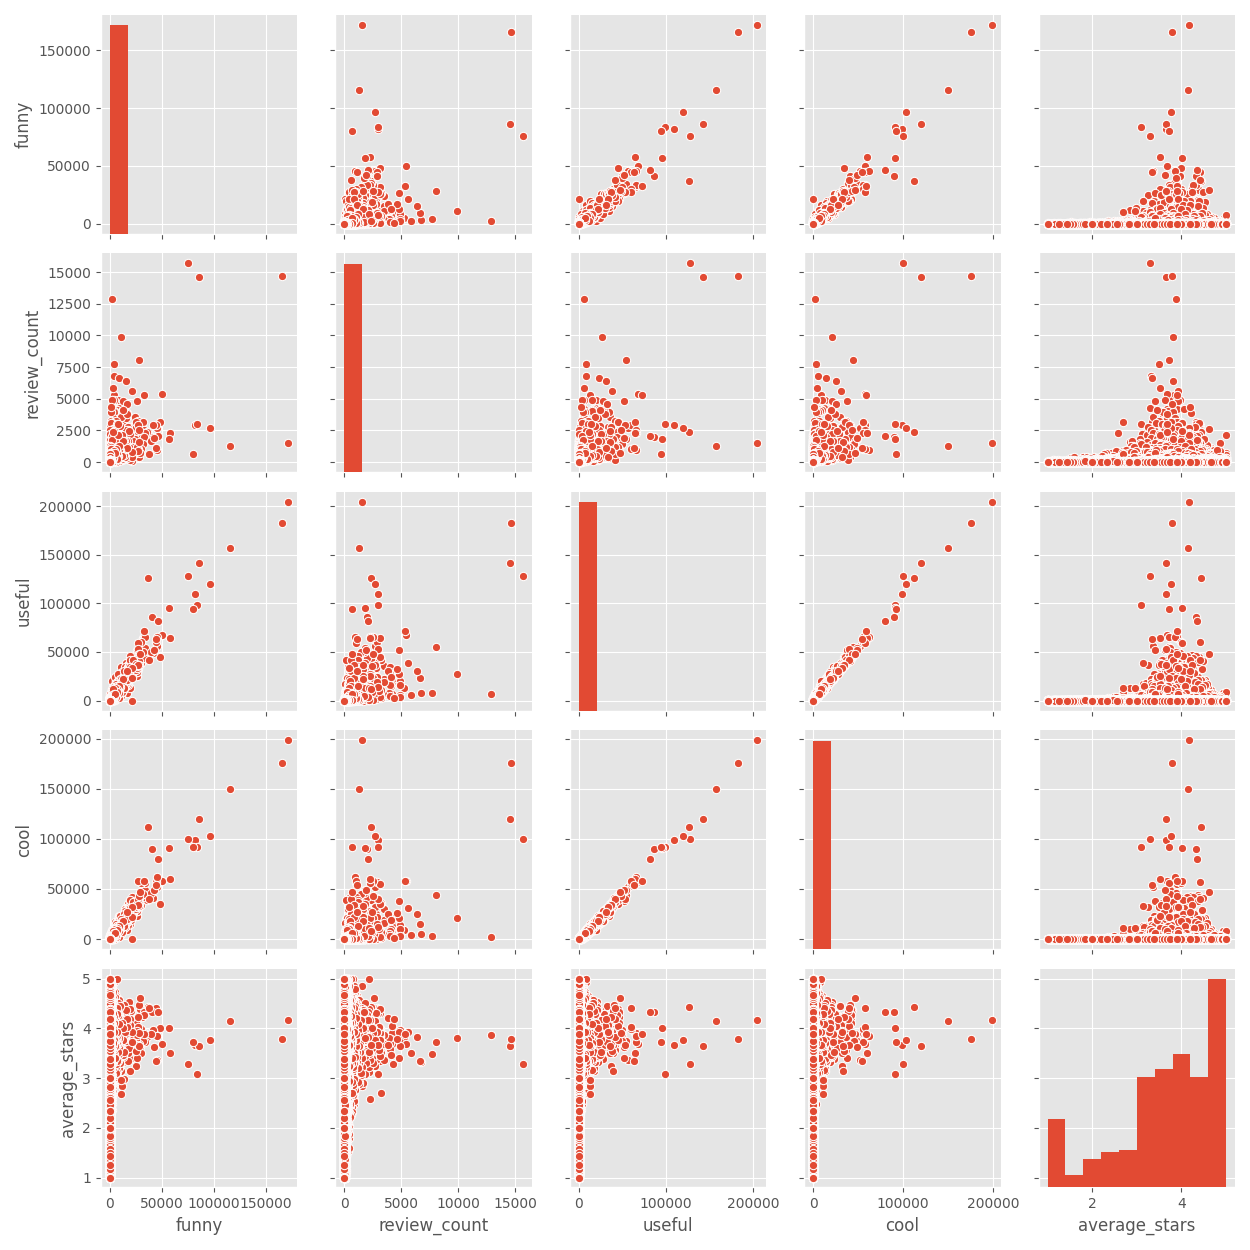

In [30]:
# Plot a scatterplot matrix for all numerical variables on the user data
sns.pairplot(data = df_user_pd, kind = 'scatter') 

# Use tight layout to ensure all column tags are visible on the plot
plt.tight_layout()

# # Use magic function to display chart in line
%matplot plt

#### Some interesting trends:
    


1. Multiple strong positive correlation observed between: <br>
   a. Funny and useful users <br>
   b. Cool and useful users <br>
   c. Funny and cool users <br> <br>
2. More users have average star ratings close to the higher end (above 3 stars) compared to lower end (below 3 stars). <br> <br>
3. Majority of the high review users tend to review businesses positively. <br> <br>
4. No real correlation between cool, funny and useful users and their review counts

# What states have the most Yelp reviews?

In [31]:
df_business_short = df_business.select('business_id', 'category', 'state')

df_business_short.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+-----+
|         business_id|    category|state|
+--------------------+------------+-----+
|6iYb2HFDywm3zjuRg...|  Gastropubs|   CO|
|6iYb2HFDywm3zjuRg...|        Food|   CO|
|6iYb2HFDywm3zjuRg...|Beer Gardens|   CO|
|6iYb2HFDywm3zjuRg...| Restaurants|   CO|
|6iYb2HFDywm3zjuRg...|        Bars|   CO|
+--------------------+------------+-----+
only showing top 5 rows

In [32]:
df_bus_rev = df_review.join(df_business_short,'business_id')

df_bus_rev.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------+-----+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|      category|state|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------+-----+
|buF9druCkbuXLX526...|   1|2014-10-11 03:34:02|    1|lWC-xP3rd6obsecCY...|  4.0|Apparently Prides...|     3|ak0TdVmGKo4pwqdJS...|       Italian|   MA|
|buF9druCkbuXLX526...|   1|2014-10-11 03:34:02|    1|lWC-xP3rd6obsecCY...|  4.0|Apparently Prides...|     3|ak0TdVmGKo4pwqdJS...|          Bars|   MA|
|buF9druCkbuXLX526...|   1|2014-10-11 03:34:02|    1|lWC-xP3rd6obsecCY...|  4.0|Apparently Prides...|     3|ak0TdVmGKo4pwqdJS...|          Food|   MA|
|buF9druCkbuXLX526...|   1|2014-10-11 03:34:02|    1|lWC-xP3rd6obsecCY...|  4.0|Apparently Pri

In [33]:
# Groupby categories to get count for each category in a new dataframe

df_bus_rev_grp = df_bus_rev.groupby("state").count()
df_bus_rev_grp.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+
|state|  count|
+-----+-------+
|   IL|    170|
|   ON|     48|
|   DE|     63|
|   MN|     30|
|   DC|     30|
|   HI|     28|
|   CA|   1484|
|   NC|     99|
|   NM|     60|
|   ME|     66|
|  ABE|     28|
|   AZ|    494|
|   NY|     44|
|   WI|     48|
|   FL|5975594|
|   WY|     54|
|   KY|     44|
|   BC|2818998|
|   MI|     18|
|   WA| 589754|
+-----+-------+
only showing top 20 rows

In [34]:
# Convert to spark dataframe to pandas dataframe
df_bus_rev_grp_pd = df_bus_rev_grp.toPandas()

# Sort values to get top states at the top
df_bus_rev_grp_pd.sort_values('count',ascending=False, inplace=True)

# Reduce the dataframe to include only top 5 states
df_bus_rev_grp_pd = df_bus_rev_grp_pd.head(5)

df_bus_rev_grp_pd.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   state     count
29    MA  10689941
21    TX   8051285
25    OR   7851639
14    FL   5975594
22    GA   5967913

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

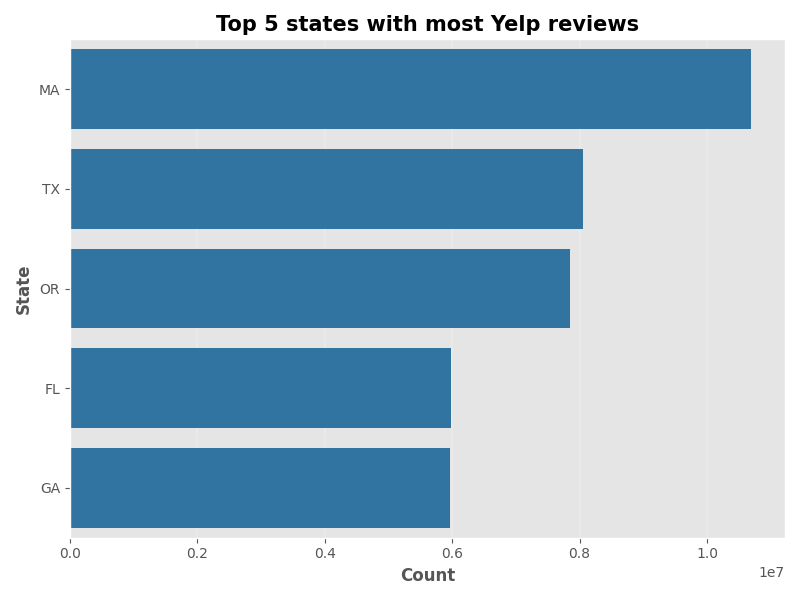

In [35]:
# Setup a matplotlib figure and axis
fig, ax = plt.subplots(figsize = (8,6))


# Draw seaborn horizontal bar chart
df_bus_rev_grp_pd_plot = sns.barplot(x = 'count', y = 'state', 
                                      data = df_bus_rev_grp_pd, 
                                      ax = ax, 
                                      color = 'tab:blue')

# Set chart title and axis labels
ax.set_title("Top 5 states with most Yelp reviews", fontweight = 'bold', fontsize = 15)
ax.set_xlabel('Count', fontweight = 'bold')
ax.set_ylabel('State', fontweight = 'bold')

# Use tight layout to ensure all column tags are visible on the plot
plt.tight_layout()

# Set applicable x-axis gridlines and disable y axis ones
ax.grid(linestyle='-', linewidth=0.25, axis = 'x')
ax.grid(visible=False, axis = 'y')

# Use magic function to display the chart inline
%matplot plt


#### Interesting that a comparatively small state like Massachussets has the most Yelp reviews and large states such as NY and CA miss out on the top 5 list. This might be different as we start looking at the same stat based on individual categories.